## Perform standard imports

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
from torch.utils.data import DataLoader  # Help load data in batches
from torchvision import datasets, transforms

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [5]:
# In loading process, you can apply multiple transformations (reshape, convert to tensor, normalize, etc) to the incoming data.
# Here we only need to convert images to tensors.

transform = transforms.ToTensor()

In [6]:
# torchvision will only download the dataset once, and in the future ill look for the local copy.
# Load training set.

train_data = datasets.MNIST(root='../Data/', train=True, download=True, transform=transform)

In [7]:
# Load test set

test_data = datasets.MNIST(root='../Data/', train=False, download=True, transform=transform)

#### Check some training data info

In [9]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [10]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [11]:
type(train_data[0])

tuple

In [12]:
# Calling the first record from train_data returns a two-item tuple.
# The first item is the 28 * 28 tensor representing the image. The second is a label.

image, label = train_data[0]

In [13]:
image.reshape(-1,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [14]:
label

5

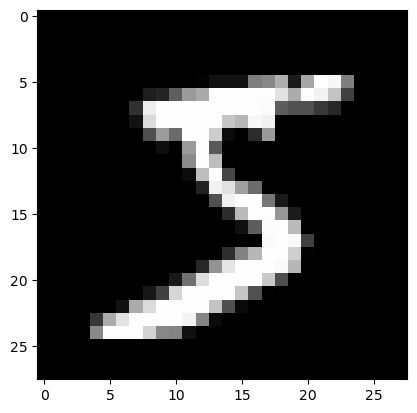

In [15]:
# View the image
# Matplotlib can interpret pixel values through a variety of colormaps.

plt.imshow(image.reshape(-1,28), cmap='gray')

## Batch loading with DataLoader

In [17]:
# Train_data is a PyTorch Dataset object (an object that supports data loading and sampling).
# batch_size=100: This parameter determines how many samples will be loaded and fed into the model at a time during training. 
# In this case, each batch will contain 100 samples. 
# Batching helps reduce memory usage and speeds up the training process, as processing the entire dataset at once is often infeasible.

# Setting shuffle=True ensures that the data is randomly shuffled before each epoch. 
# This improves the model's generalization ability because it prevents the model from learning the order of the samples, 
# which could introduce unintended biases.

torch.manual_seed(101)

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [18]:
# Once DataLoader is defined, we can create a grid of images using torchvision.utils.make_grid

from torchvision.utils import make_grid

In [19]:
for images, labels in train_loader:
    break

In [20]:
images.shape

torch.Size([100, 1, 28, 28])

In [21]:
labels.shape

torch.Size([100])

In [22]:
# Print the first 12 labels
print('Labels: ', labels[:15].numpy())

Labels:  [7 2 3 5 8 5 3 6 9 9 1 3 5 5 4]


In [23]:
images[:15]

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

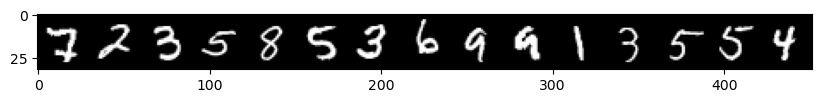

In [24]:
# Print the first 15 images
im = make_grid(images[:15], nrow=15)  # the default nrow is 8
plt.figure(figsize=(10,4))
# We need to transpose the images from CWH to WHC (channel number, width, height (0, 1, 2) to width, height, channel number (1, 2, 0))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

## Define the model

In [26]:
# We will use fully connected layers to develop a multilayer perceptron.
# After flatten the 28x28 tensors, the input size is 784
# The output size represents the 10 possible digits.
# Here I set the hidden layers to [120, 84]. If the model works well, no need to adjust it.

class MultilayerPerceptron(nn.Module):

    def __init__(self, in_sz=784, out_sz=10, layers=[120, 84]):

        super().__init__()

        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)

    def forward(self, X):
        # There are three activation functions: relu for the first two, the third one softmax is for the output
        # it is a multiple classification model
        # Here we used F.relu() as a functional wrapper on the linear layer directly.
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X, dim=1)

In [27]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [28]:
# Count the model parameters.
# The number of weights in each layer is given by the product of the input and output features.
# Each layer has a bias for each output feature.
# 784 * 120 (weights) + 120 (bias) + 120 * 84 (weights) + 84 (bias) + 84 * 10 (weights) + 10 (bias) = 105214

params = 0

for param in model.parameters():
    print(param.numel())
    params += param.numel()

print('\n')
print(params)

94080
120
10080
84
840
10


105214


### Define loss function & optimizer

In [30]:
# CrossEntropyLoss is ideal for multi-class classification problems.
# Adam is preferred due to its adaptability and efficiency in training deep learning models. 
# It generally leads to faster convergence with less manual tuning of hyperparameters, making it a popular choice for neural network optimization.

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#### Flatten the training data

In [32]:
images.view(100, -1).shape

torch.Size([100, 784])

In [33]:
# Here I ran the test data through the model during each epoch, so that I can compare loss & accuracy on the same plot.

import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):

    train_corr = 0
    test_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):

        b += 1

        # y_pred is the output of the model. typically a tensor containing the raw scores (logits) for each class.
        # .data extracts the tensor holding the actual values 
        # Though in modern PyTorch, it's better to use y_pred.detach() to avoid issues with autograd
        
        y_pred = model(X_train.view(100, -1))
        loss = criterion(y_pred, y_train)

        # The function torch.max(input, dim) computes the maximum values along a specified dimension (dim)
        # dim=1 means you are computing the max along rows.
        # torch.max() function returns a tensor of maximum values, and a tensor of the indices where the max values were found.
        # The result of torch.max() returns two outputs: tensor of maximum values and tensor of indices
        # predicted is the predicted class label
        
        predicted = torch.max(y_pred.data, 1)[1]
        train_corr += (predicted == y_train).sum()

        # Calling optimizer.zero_grad() ensures that the gradients are cleared out before computing them for the current batch.
        # The optimizer (e.g., Adam, SGD) takes the gradients stored in each parameter's grad attribute 
        # and adjusts the parameters according to the chosen optimization algorithm.
        
        optimizer.zero_grad()  # Resets the gradients of all model parameters before performing the backpropagation step.
        loss.backward()  # Computes the gradients of the loss function with respect to the model's parameters.
        optimizer.step()  # Updates the model's parameters based on the gradients computed in the previous step.

        if b%200 == 0:
            accuracy = train_corr.item()*100/(100*b)
            print(f'Epoch {i} Batch {b}  Loss: {loss.item()}  Accuracy: {accuracy}')

    train_losses.append(loss)
    train_correct.append(train_corr)
    
    with torch.no_grad():

        for b, (X_test,y_test) in enumerate(test_loader):

            y_val = model(X_test.view(500, -1))

            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted==y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(test_corr)

total_time = time.time() - start_time
print(f'Duration: {total_time/60} mins')

Epoch 0 Batch 200  Loss: 0.23541301488876343  Accuracy: 83.25
Epoch 0 Batch 400  Loss: 0.35372811555862427  Accuracy: 87.5275
Epoch 0 Batch 600  Loss: 0.13645225763320923  Accuracy: 89.57333333333334
Epoch 1 Batch 200  Loss: 0.2445889711380005  Accuracy: 94.84
Epoch 1 Batch 400  Loss: 0.14444680511951447  Accuracy: 95.055
Epoch 1 Batch 600  Loss: 0.07348378002643585  Accuracy: 95.355
Epoch 2 Batch 200  Loss: 0.08600125461816788  Accuracy: 96.55
Epoch 2 Batch 400  Loss: 0.06034965440630913  Accuracy: 96.6425
Epoch 2 Batch 600  Loss: 0.06324753910303116  Accuracy: 96.71333333333334
Epoch 3 Batch 200  Loss: 0.11463852971792221  Accuracy: 97.635
Epoch 3 Batch 400  Loss: 0.06223197281360626  Accuracy: 97.475
Epoch 3 Batch 600  Loss: 0.030628442764282227  Accuracy: 97.495
Epoch 4 Batch 200  Loss: 0.11356642842292786  Accuracy: 98.195
Epoch 4 Batch 400  Loss: 0.04613405838608742  Accuracy: 98.045
Epoch 4 Batch 600  Loss: 0.05497684329748154  Accuracy: 98.045
Epoch 5 Batch 200  Loss: 0.0077648

### Plot the loss and accuracy comparisons

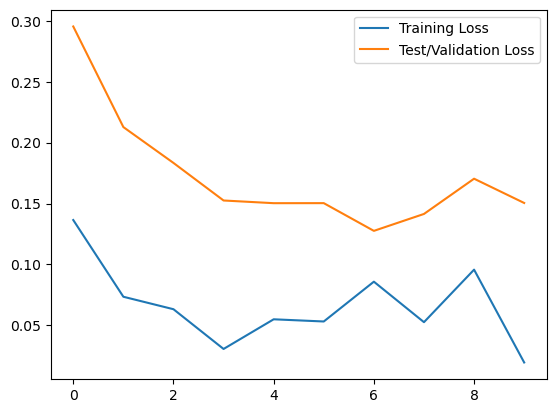

In [35]:
plt.plot([loss.item() for loss in train_losses], label='Training Loss')
plt.plot([loss.item() for loss in test_losses], label='Test/Validation Loss')
plt.legend()

In [36]:
# calculate accuracy of each epoch

train_acc = [100*t/60000 for t in train_correct]

In [37]:
train_acc

[tensor(89.5733),
 tensor(95.3550),
 tensor(96.7133),
 tensor(97.4950),
 tensor(98.0450),
 tensor(98.3867),
 tensor(98.6800),
 tensor(98.9133),
 tensor(99.1333),
 tensor(99.2633)]

In [38]:
test_acc = [100*t/10000 for t in test_correct]
test_acc

[tensor(94.3500),
 tensor(95.9100),
 tensor(96.9100),
 tensor(97.0900),
 tensor(97.5000),
 tensor(97.6500),
 tensor(97.8700),
 tensor(97.7700),
 tensor(97.5600),
 tensor(97.6600)]

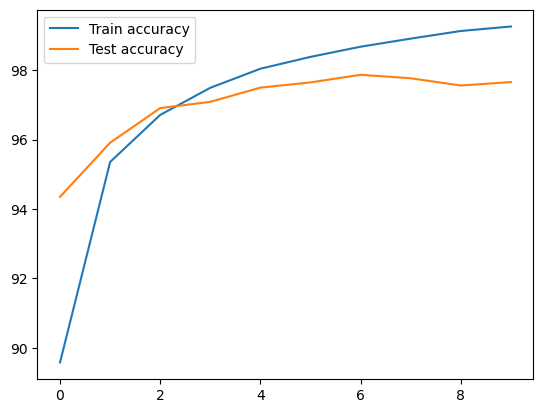

In [39]:
plt.plot(train_acc, label='Train accuracy')
plt.plot(test_acc, label='Test accuracy')
plt.legend()

In [40]:
# new unseed data

test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [41]:
with torch.no_grad():
    correct = 0

    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

In [42]:
100*correct.item()/len(test_data)

97.66

#### Display the confusion matrix

In [44]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 974,    0,    5,    0,    2,    2,    5,    3,    4,    5],
       [   0, 1124,    3,    0,    0,    0,    3,    9,    0,    2],
       [   0,    3, 1002,    3,    1,    0,    1,   11,    2,    0],
       [   3,    2,    6,  991,    0,   14,    1,    1,    3,    3],
       [   0,    0,    2,    0,  966,    3,    2,    3,    3,    9],
       [   0,    0,    0,    3,    0,  854,    2,    1,    2,    2],
       [   1,    1,    1,    0,    5,    4,  943,    1,    1,    0],
       [   0,    0,    3,    2,    0,    2,    0,  977,    2,    0],
       [   2,    5,   10,    6,    1,   12,    1,    3,  952,    5],
       [   0,    0,    0,    5,    7,    1,    0,   19,    5,  983]],
      dtype=int64)

In [45]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses, i).astype('int64')

# Display the number of misses
len(misses)

234

In [46]:
# Display hte first 12 index positions
misses[:12]

array([ 80, 149, 151, 247, 259, 321, 340, 445, 448, 495, 551, 582],
      dtype=int64)

In [47]:
# Set up an iterator to feed batched rows
r = 12  # row size
row = iter(np.array_split(misses, len(misses)//r+1))

Index: [ 80 149 151 247 259 321 340 445 448 495 551 582]
Label: [7 2 9 4 6 2 5 6 9 8 7 8]
Guess: [9 4 8 6 0 7 3 0 8 0 1 2]


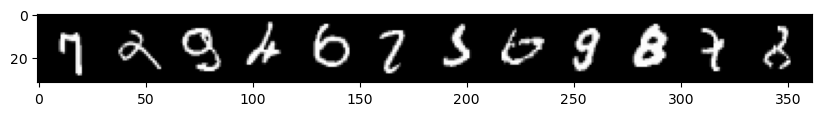

In [48]:
nextrow = next(row)
print("Index:", nextrow)
print("Label:", y_test.index_select(0,torch.tensor(nextrow)).numpy())
print("Guess:", predicted.index_select(0,torch.tensor(nextrow)).numpy())

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));